<a href="https://colab.research.google.com/github/rurounigit/EasyOCR/blob/master/easyocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 66.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 21.2 MB/s eta 0:00:00


In [3]:
# load example images
!npx degit JaidedAI/EasyOCR/examples -f

Need to install the following packages:
  degit@2.8.4
Ok to proceed? (y) ^C


In [4]:
# list them
!ls -l

total 64
-rw-r--r-- 1 root root 60392 Oct 18 12:55 chinese_tra.jpg
drwxr-xr-x 1 root root  4096 Oct 14 13:23 sample_data


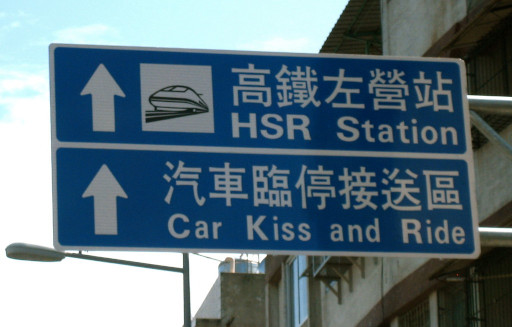

In [5]:
# show an image
import PIL
from PIL import ImageDraw
im = PIL.Image.open("chinese_tra.jpg")
im

In [7]:
# Create a reader to do OCR.
# If you change to GPU instance, it will be faster. But CPU is enough.
# (by MENU > Runtime > Change runtime type > GPU, then redo from beginning )
import easyocr
reader = easyocr.Reader(['ch_sim','en'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [8]:
# Doing OCR. Get bounding boxes.
bounds = reader.readtext('chinese_tra.jpg')
bounds

[([[224, 55], [461, 55], [461, 122], [224, 122]],
  '高臧左瞥站',
  0.01887765169949704),
 ([[228, 107], [317, 107], [317, 147], [228, 147]], 'HSR', 0.9827669262886047),
 ([[330, 112], [465, 112], [465, 152], [330, 152]],
  'Station',
  0.9994339437854226),
 ([[154, 151], [471, 151], [471, 225], [154, 225]],
  '汽事酶停接途匾',
  0.013215615130148583),
 ([[163, 209], [229, 209], [229, 245], [163, 245]], 'Car', 0.9935334160867664),
 ([[240, 210], [387, 210], [387, 249], [240, 249]],
  'Kiss and',
  0.8508320403170739),
 ([[397, 215], [473, 215], [473, 251], [397, 251]], 'Ride', 0.608884824372003)]

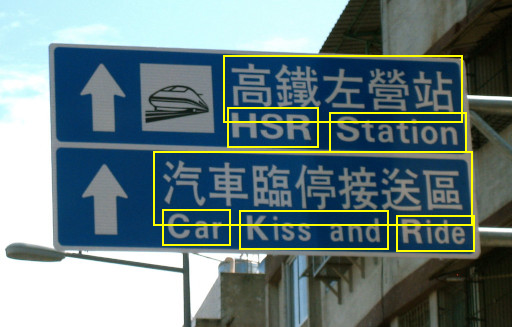

In [9]:
# Draw bounding boxes
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

draw_boxes(im, bounds)